In [1]:
#testing reaction network code
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, Tsit5, SaveAt, Kvaerno3, PIDController
import optax  
import pickle as pkl
from reaction_nets import rxn_net
from functools import partial

# Testing the triangle toplogy parameterization

In [77]:
jax.config.update("jax_enable_x64", True)

In [78]:
#generate flow profiles with params cal uses
rxn=rxn_net('triangle_a')
t_points = jnp.linspace(0.0, 10.0, 200)
all_features=jnp.linspace(-20, 20, 50)
initial_conditions = jnp.log(jnp.array([0.3, 0.4, 0.3]))

In [79]:
initial_params=jnp.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
true_params=-1*jnp.array([0, 0, 0, np.log(1), 0, np.log(10), np.log(1), 0, np.log(0.1), np.log(0.05), 0, np.log(4)])
file = open('data/train/triangle_a_training_data', 'rb')
data=pkl.load(file)
file.close()

In [80]:
optimized_params=data['optimized_params']

In [81]:
def profile(params, initial_conditions, all_features):
    solns=[]
    for feature in all_features:
        all_params=jnp.append(params, feature)
        solution = rxn.integrate(solver=Tsit5(), stepsize_controller=PIDController(0.005, 0.01), t_points=t_points, dt0=0.001, initial_conditions=initial_conditions, args=all_params, max_steps=10000)
        solns.append(solution.ys[-1].copy())
    return jnp.array(solns)

In [82]:
species_list = ['A', 'B', 'C']

In [83]:
E_A, E_B, E_C, B_AB, F_AB, B_BA, B_AC, F_AC, B_CA, B_BC, F_BC, B_CB=initial_params
F_BC_in=0
F_CB_in=-F_BC_in
F_AB_in, F_BA_in, F_AC_in,F_CA_in = 0, 0, 0, 0

F_BA=-F_AB
F_CA=-F_AC
F_CB=-F_BC

#jax.debug.print('params:{params}', params=params)
W_AB=jnp.exp(E_A-B_AB+0.5*F_AB + 0.5*F_AB_in)
print(f'{E_A}-{B_AB}+{0.5*F_AB}+{0.5*F_AB_in}')
W_BA=jnp.exp(E_B-B_BA+0.5*F_BA + 0.5*F_BA_in)
W_AC=jnp.exp(E_A-B_AC+0.5*F_AC + 0.5*F_AC_in)
W_CA=jnp.exp(E_C-B_CA+0.5*F_CA + 0.5*F_CA_in)
W_BC=jnp.exp(E_B-B_BC+0.5*F_BC + 0.5*F_BC_in)
W_CB=jnp.exp(E_C-B_CB+0.5*F_CB + 0.5*F_CB_in)

print(W_AB, W_AC, W_BC, W_BA, W_CA, W_CB)

0.5-0.5+0.25+0.0
1.2840254166877414 1.2840254166877414 1.2840254166877414 0.7788007830714049 0.7788007830714049 0.7788007830714049


In [84]:
solns_initial= profile(initial_params, initial_conditions, all_features)

In [85]:
E_A, E_B, E_C, B_AB, F_AB, B_BA, B_AC, F_AC, B_CA, B_BC, F_BC, B_CB=true_params
F_BC_in=0
F_CB_in=-F_BC_in
F_AB_in, F_BA_in, F_AC_in,F_CA_in = 0, 0, 0, 0

F_BA=-F_AB
F_CA=-F_AC
F_CB=-F_BC

#jax.debug.print('params:{params}', params=params)
W_AB=jnp.exp(E_A-B_AB+0.5*F_AB + 0.5*F_AB_in)
W_BA=jnp.exp(E_B-B_BA+0.5*F_BA + 0.5*F_BA_in)
W_AC=jnp.exp(E_A-B_AC+0.5*F_AC + 0.5*F_AC_in)
W_CA=jnp.exp(E_C-B_CA+0.5*F_CA + 0.5*F_CA_in)
W_BC=jnp.exp(E_B-B_BC+0.5*F_BC + 0.5*F_BC_in)
W_CB=jnp.exp(E_C-B_CB+0.5*F_CB + 0.5*F_CB_in)

print(W_AB, W_AC, W_BC, W_BA, W_CA, W_CB)


1.0 1.0 0.05000000000000001 10.000000000000002 0.10000000000000002 4.0


In [86]:
solns_true=profile(true_params, initial_conditions, all_features)

In [87]:
E_A, E_B, E_C, B_AB, F_AB, B_BA, B_AC, F_AC, B_CA, B_BC, F_BC, B_CB=optimized_params
F_BC_in=0
F_CB_in=-F_BC_in
F_AB_in, F_BA_in, F_AC_in,F_CA_in = 0, 0, 0, 0

F_BA=-F_AB
F_CA=-F_AC
F_CB=-F_BC

#jax.debug.print('params:{params}', params=params)
W_AB=jnp.exp(E_A-B_AB+0.5*F_AB + 0.5*F_AB_in)
print(f'{E_A}-{B_AB}+{0.5*F_AB}+{0.5*F_AB_in}')
W_BA=jnp.exp(E_B-B_BA+0.5*F_BA + 0.5*F_BA_in)
W_AC=jnp.exp(E_A-B_AC+0.5*F_AC + 0.5*F_AC_in)
W_CA=jnp.exp(E_C-B_CA+0.5*F_CA + 0.5*F_CA_in)
W_BC=jnp.exp(E_B-B_BC+0.5*F_BC + 0.5*F_BC_in)
W_CB=jnp.exp(E_C-B_CB+0.5*F_CB + 0.5*F_CB_in)

print(W_AB, W_AC, W_BC, W_BA, W_CA, W_CB)

0.010380762167212171-0.956231436383443+0.00847779702630139+0.0
0.39165541184885 0.4058907792399219 0.12421739585056382 1.3091706673547363 2.6611853250292286 0.7280896022305673


In [88]:
solns_opt=profile(optimized_params, initial_conditions, all_features)

In [ ]:
fig, axs=plt.subplots(3, figsize=(5, 10))
for species, profile in zip(species_list, jnp.exp(solns_initial.T)):
    axs[0].plot(all_features, profile, label=f'{species}')
axs[0].plot(all_features, jnp.sum(jnp.exp(solns_initial.T), axis=0), label='total') 

for species, profile in zip(species_list, jnp.exp(solns_opt.T)):
    axs[1].plot(all_features, profile, label=f'{species}')

for species, profile in zip(species_list, jnp.exp(solns_true.T)):
    axs[2].plot(all_features, profile, label=f'{species}')
axs[2].plot(all_features, jnp.sum(jnp.exp(solns_true.T), axis=0), label='total') 

for i in range(3):
    axs[i].legend(bbox_to_anchor=[1.05, 1], loc='upper left')
    axs[i].set_xlabel(r'$F_a$')
    axs[i].set_ylabel(r'$\pi_i$')
    axs[i].set_xlim(-10, 15)

axs[0].set_title('Initial params')
axs[1].set_title('optimized params')
axs[2].set_title('True params')

fig.tight_layout()

# Generating bimodal profiles to sample training data from 

In [26]:
#sample from a mixture of two gaussians
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [27]:
jax.config.update("jax_enable_x64", True)

In [28]:
def plot_gaussian_mixture(x, mean1, var1, mean2, var2, weights):
    weight1, weight2=weights
    gaussian1 = norm.pdf(x, mean1, np.sqrt(var1))
    gaussian2 = norm.pdf(x, mean2, np.sqrt(var2))

    # Mixture
    mixture = weight1 * gaussian1 + weight2 * gaussian2

    return mixture

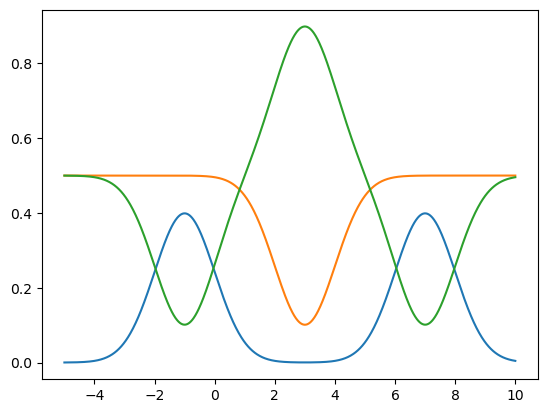

In [35]:
x=np.linspace(-5, 10, 1000)
weights=np.array([0.5, 0.5])
mean1, mean2, var1, var2=-1, 7, 1, 1
mixture_profile= 2*plot_gaussian_mixture(x, mean1, var1, mean2, var2, weights)
plt.plot(x, mixture_profile)
plt.plot(x, -norm.pdf(x, 3, np.sqrt(1))+0.5)
plt.plot(x, 1-(-norm.pdf(x, 3, np.sqrt(1))+0.5)-mixture_profile)